## Library Import

In [1]:
#Importing libraries packages
import math as mlib #Math
import pandas as pd #Pandas
import numpy as np #NumPy
import matplotlib.pyplot as plt #MatPlotLib
import seaborn as sns #Seaborn
import statsmodels.api as sm #Stats Models

#Import Display from IPython
from IPython.display import display

from matplotlib import ft2font

#Set matplotlib output to be inline Jupyter
%matplotlib inline

import openpyxl

## Data Loading

In [2]:
#Loading data source, adding the header to the data

data = pd.read_csv('housing.csv') 
headers =  ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data.columns = headers

#Checking Data Source
print("Data Source File Shape:\n", data.shape)
print()
print("Data Source File Head:") 
display(data.head()) 

Data Source File Shape:
 (505, 14)

Data Source File Head:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [3]:
### Write data into excel file
data.to_excel('housing_excel.xlsx', sheet_name='housing_data', index = False)

## EDA

In [4]:
data.describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
1%,0.013830,0.000000,1.252800,0.000000,0.398000,4.523360,6.608000,1.205712,1.000000,188.000000,13.000000,6.720000,2.882400,7.008000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
99%,41.402104,90.000000,25.650000,1.000000,0.871000,8.335400,100.000000,9.222796,24.000000,666.000000,21.200000,396.900000,33.938800,50.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Conclusiom: from the statistics table above we can see that some signals have min values less than 1 -th percentile or/and max values greater than 99-th percentile. The outliers are present in the data set.

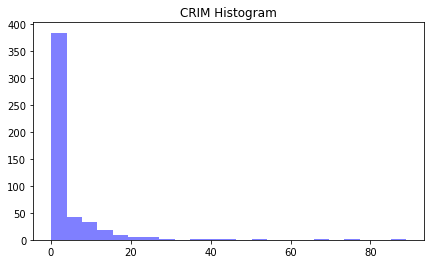

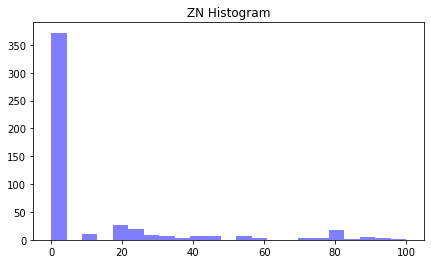

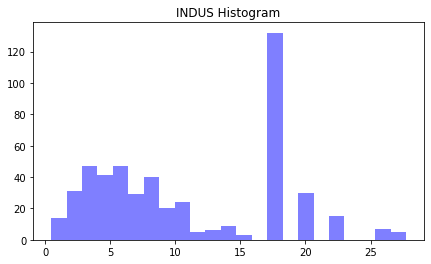

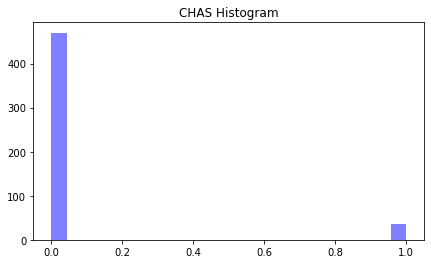

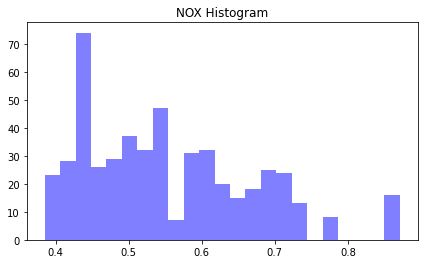

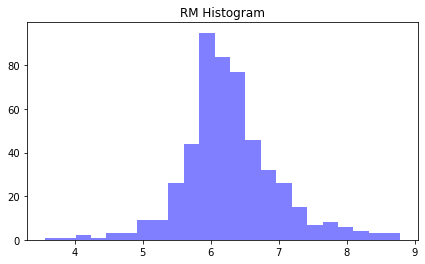

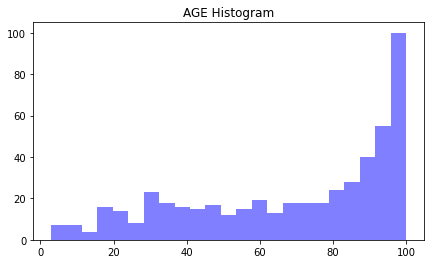

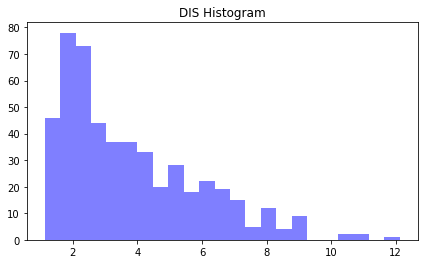

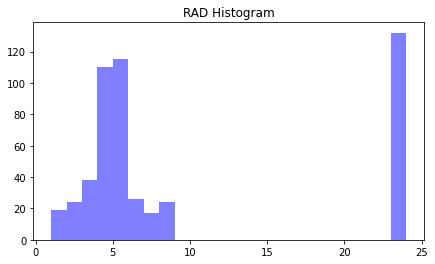

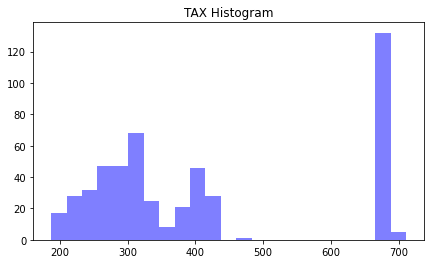

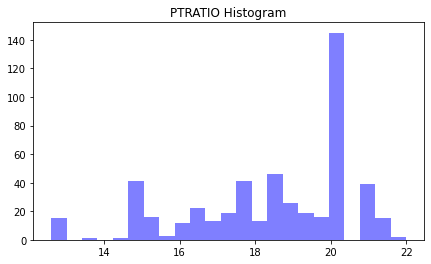

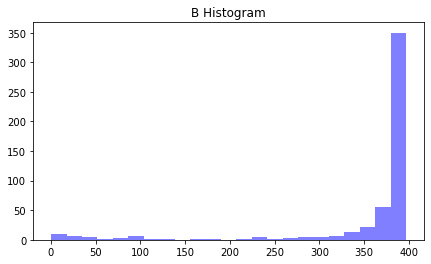

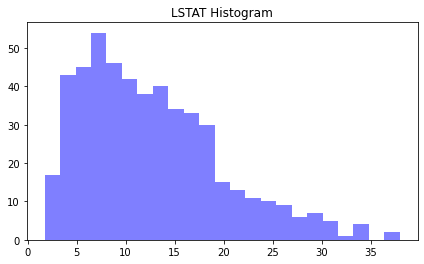

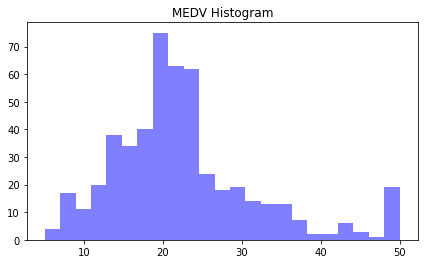

In [5]:
#Ploting the histograms of the attributes and target
for column in data.columns:
    
    plt.figure(figsize=(7, 4))
    x_vector = data[column]
    n_bins = mlib.sqrt(x_vector.size); n_bins = mlib.ceil(n_bins)
    plt.hist(x_vector, bins=n_bins, color='b', alpha=0.5)
    plt.title(column + " " + "Histogram")
    plt.show()

### Conclusion: the histograms of the signals visualize the presence of the outliers.

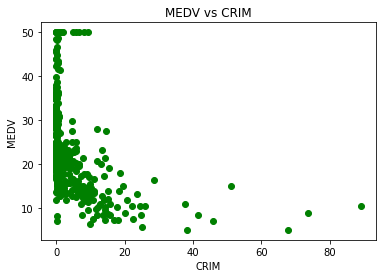

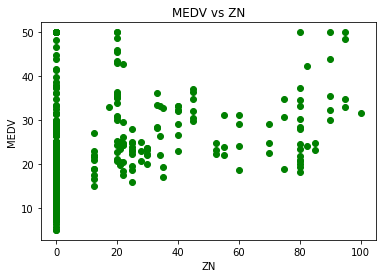

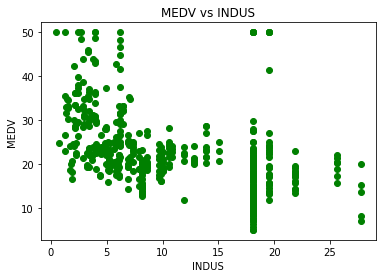

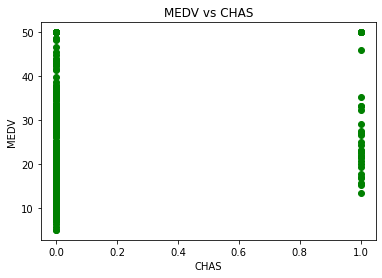

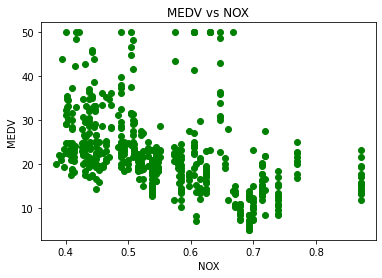

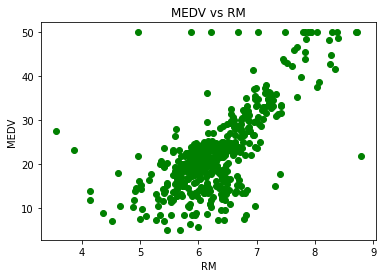

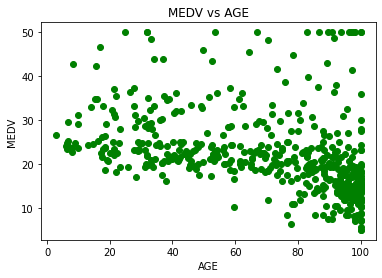

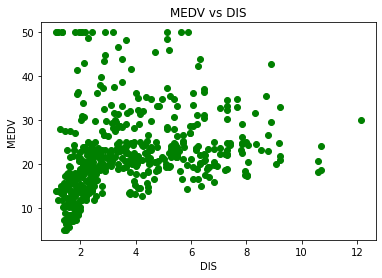

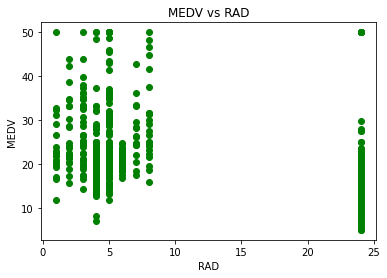

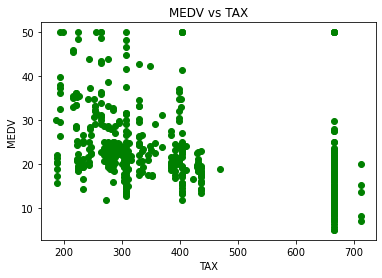

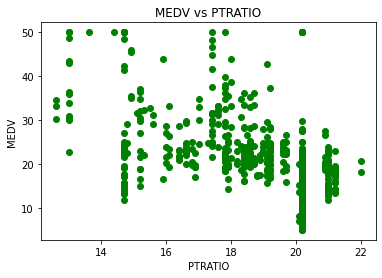

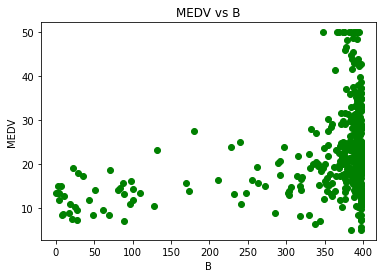

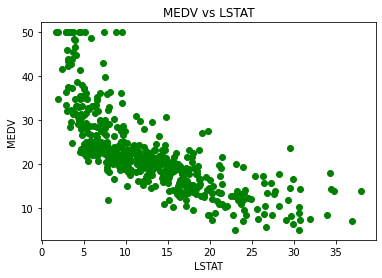

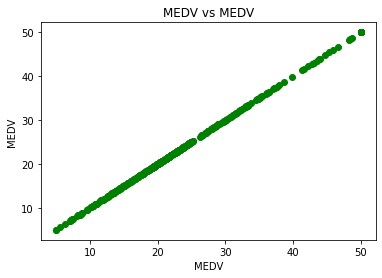

In [6]:
# Plot the scatter plots between target and the features
for column in data.columns:
    
    plt.scatter(data[column], data['MEDV'], c='green')
    
    plt.title("MEDV vs " + column)
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.show()

### Conclusion: the scatter plots of some pairs signal/target visualize the presence of the outliers.

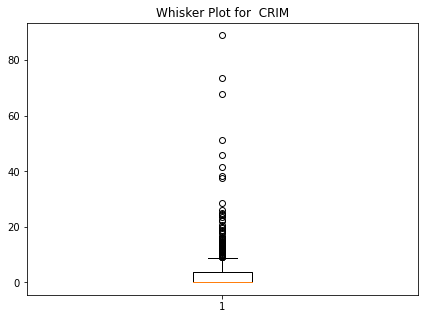

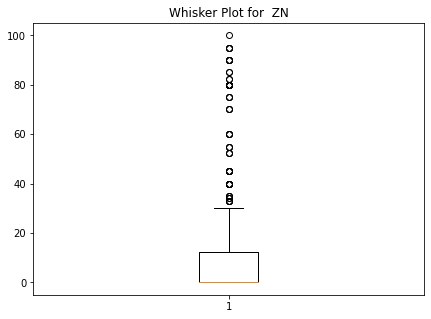

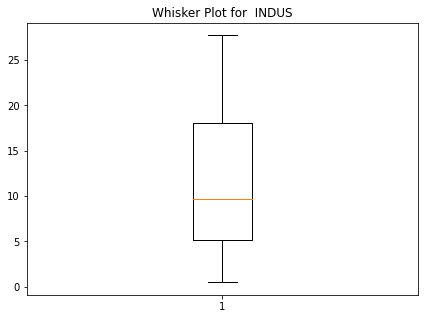

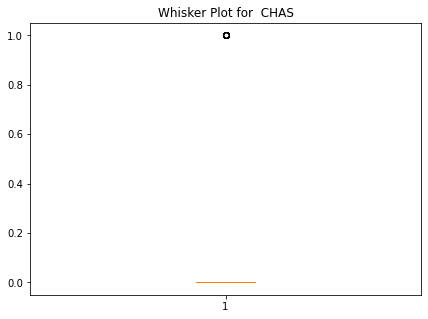

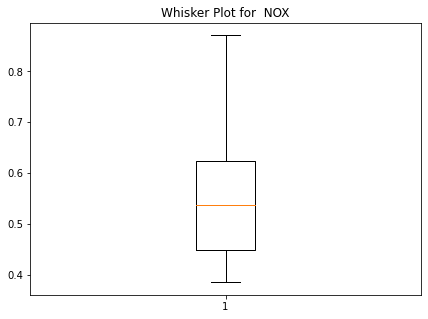

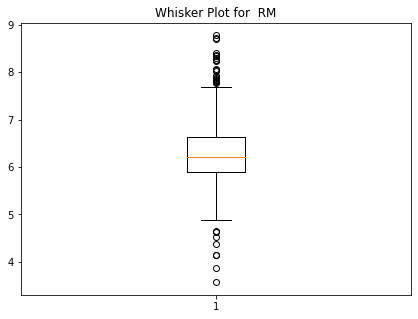

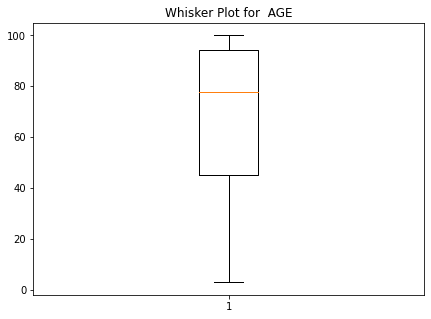

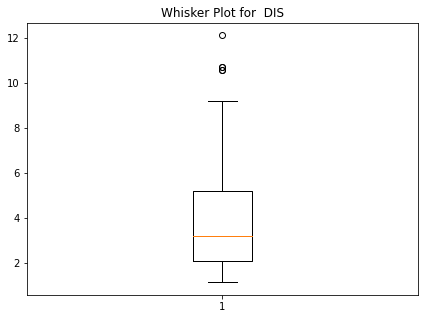

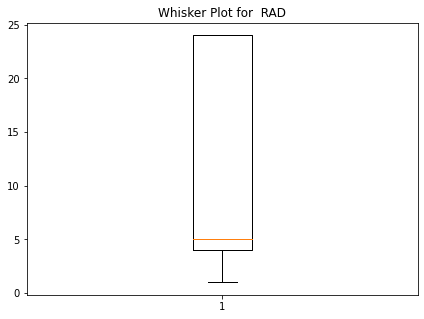

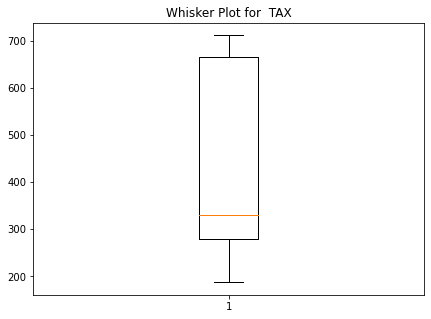

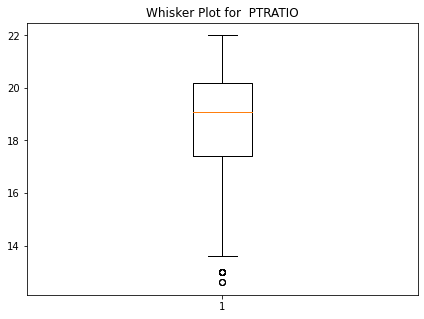

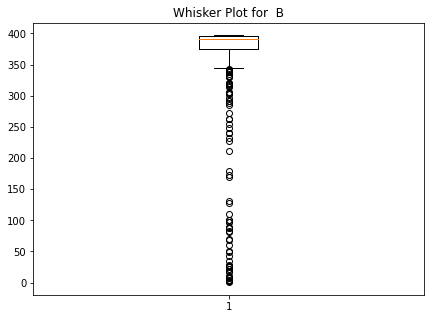

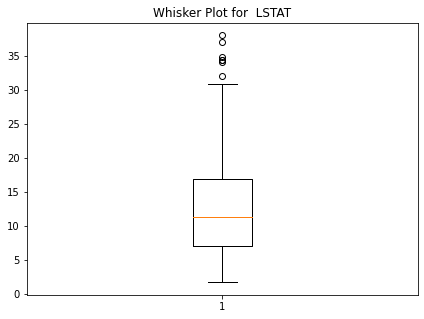

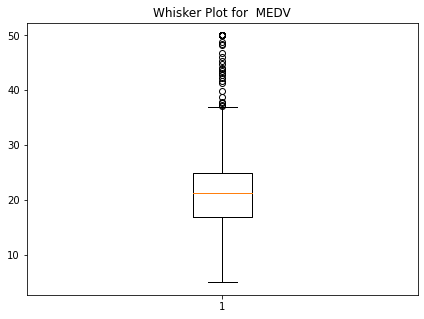

In [7]:
for column in data.columns:
    fig = plt.figure(figsize =(7, 5))
    plt.boxplot(data[column])
    plt.title("Whisker Plot for  " + column)
    plt.show()
    
    

### Conclusion: The Box-and-Whisker plots confirm that some of the signals have the outliers - extreme values below min or above max in the distribution.

## Creating Outlier Detection Model

### The model will use Inter Quartile range to detect and mark the outliers for each feature and target. 
### IQR = Q3 - Q1
### Q3 is a value that represents 75-th percentile
### Q1 is a value that represents 25-th percentile
### According to the approach outliers are values below lower border and above the upper border. 
### Lower border = Q1 - 1.5 * IQR
### Upper border = Q3 + 1.5 * IQR

### We will drop the column CHAS as it is a binary value column ( 0 or 1) and does not have outliers

In [8]:
#Drop the column CHAS
data = data.drop("CHAS", axis=1)

In [9]:
# Creating the model
for column in data.columns:
    # Find Q1, Q3 and IQR
    Q1 = np.percentile(data[column], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(data[column], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    # Find upper and lower  borders
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    
    # Find the outliers above the upper bound
    upper_outlier = data[column] > upper_bound 
    print("************Column*************:",column)
    print()
    print("Upper bound:",upper_bound)
    print("Outliers: ", np.where(upper_outlier))
    print()
 
    # # Find the outliers below the lower bound
    lower_outlier = data[column] < lower_bound
    print("Lower bound:", lower_bound)
    print("Outliers: ",np.where(lower_outlier))
    print()
    print()

************Column*************: CRIM

Upper bound: 9.072235000000001
Outliers:  (array([366, 370, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 383,
       384, 385, 386, 387, 391, 393, 397, 398, 399, 400, 401, 402, 403,
       404, 405, 406, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417,
       418, 419, 421, 424, 425, 426, 428, 430, 433, 434, 435, 436, 437,
       438, 439, 440, 442, 443, 444, 446, 447, 453, 467, 468, 476, 477,
       478], dtype=int64),)

Lower bound: -5.3118050000000006
Outliers:  (array([], dtype=int64),)


************Column*************: ZN

Upper bound: 31.25
Outliers:  (array([ 38,  39,  53,  54,  55,  56,  64,  65, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       253, 254, 255, 273, 274, 275, 276, 277, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 330, 331, 340, 342, 343, 346, 347, 348, 349, 350, 351,
       352, 353, 354], dtype=

### Mark outliers on the scatter plot

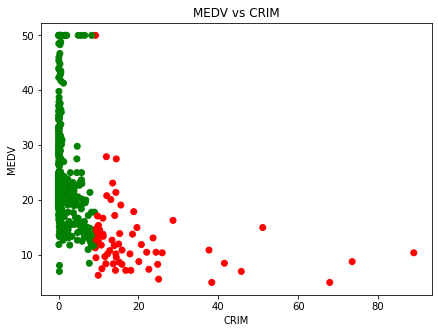

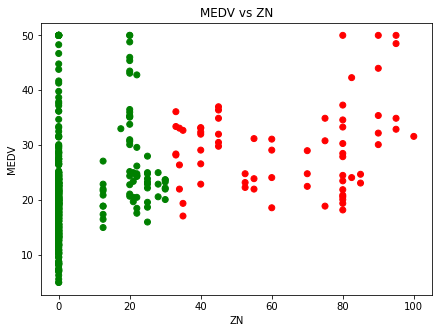

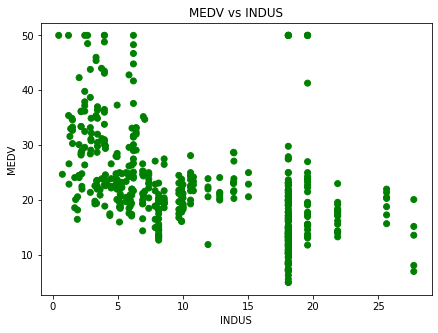

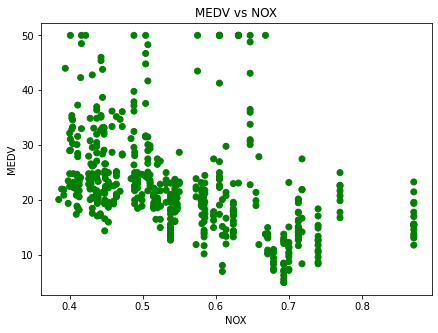

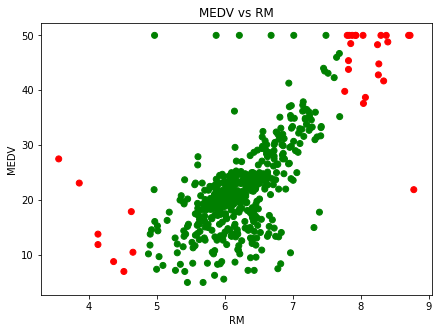

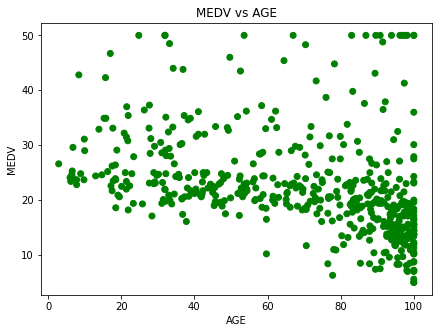

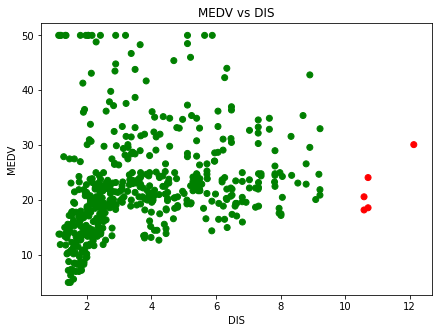

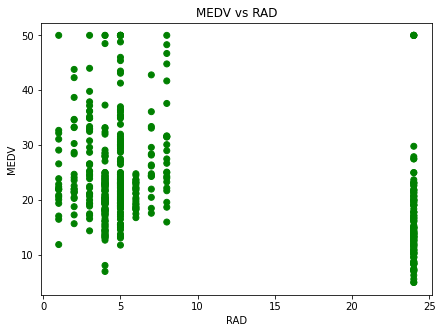

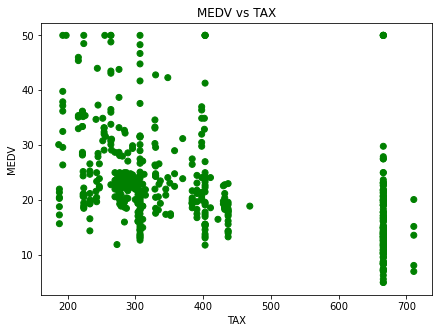

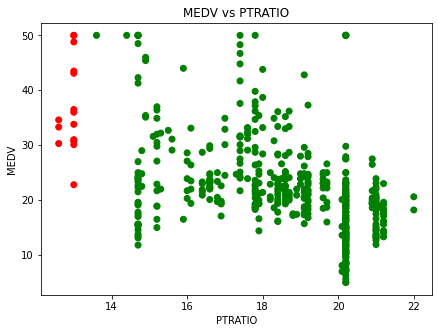

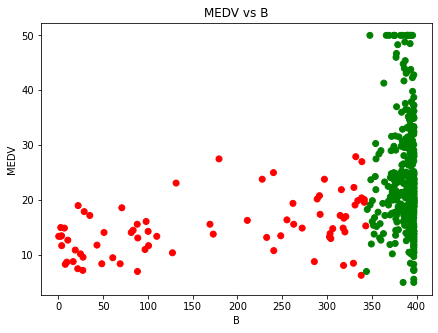

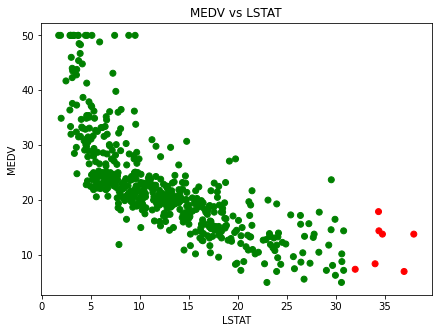

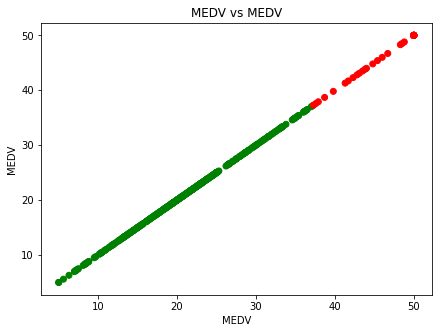

In [10]:
for column in data.columns:
    fig = plt.figure(figsize =(7, 5))
    # Find Q1, Q3 and IQR
    Q1 = np.percentile(data[column], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(data[column], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    # Find upper and lower  borders
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    upper_outlier = data[column] > upper_bound
    lower_outlier = data[column] < lower_bound
    colors = np.where(upper_outlier | lower_outlier,'r','g')
    plt.scatter(data[column], data['MEDV'], c=colors)
    
    plt.title("MEDV vs " + column)
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.show()